In [362]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings 
from datetime import date
from scipy import stats 
filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [364]:
#Load gift data
apragift = pd.read_csv('data/ApraGift.csv')
apragift.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176728 entries, 0 to 176727
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   GIFT_ID           176728 non-null  int64  
 1   CONTACT_ID        176728 non-null  int64  
 2   GIFT_AMOUNT       176728 non-null  float64
 3   GIFT_DATE         176728 non-null  object 
 4   CAMPAIGN          96845 non-null   object 
 5   APPEAL            176728 non-null  object 
 6   PRIMARY_UNIT      176728 non-null  object 
 7   GIFT_CHANNEL      98794 non-null   object 
 8   PAYMENT_TYPE      176728 non-null  object 
 9   GIFT_DESIGNATION  176728 non-null  object 
 10  GIFT_TYPE         176728 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 14.8+ MB


In [366]:
#Check gift load
apragift.head()

GIFT_ID   CONTACT_ID  GIFT_AMOUNT  GIFT_DATE         CAMPAIGN         \
0  626242967   181224721   5000000.0   12/21/2008  Campaign for Students   
1  619321323   181224724   5000000.0   12/21/2008  Campaign for Students   
2  619317311   181224724   5000000.0   12/21/2018      Insights Campaign   
3  626225008   181227667   5000000.0    5/30/2011  Campaign for Students   
4  626228684   181227667   5000000.0    8/21/2014                    NaN   

             APPEAL            PRIMARY_UNIT  GIFT_CHANNEL PAYMENT_TYPE  \
0  Scholarship Support Appeal  Attain Campus      NaN         Gift       
1  Scholarship Support Appeal  Attain Campus      NaN         Gift       
2       Monthly Giving Appeal  Attain Campus     Mail         Gift       
3  Honoring Traditions Appeal  Attain Campus      NaN         Gift       
4  Scholarship Support Appeal  Attain Campus      NaN         Gift       

    GIFT_DESIGNATION    GIFT_TYPE    
0  Social Justice Fund  Hard Credit  
1  Social Justice Fund  Soft Credit  
2           Unity Fund  Hard Credit  
3        Clarence Fund  Hard Credit  
4       Education Fund  Hard Credit

In [368]:
#Load interaction data
aprainter = pd.read_csv('data/ApraInter.csv')
aprainter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12385 entries, 0 to 12384
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CONTACT_ID               12385 non-null  int64 
 1   INTERACTION_DATE         12385 non-null  object
 2   INTERACTION_TYPE         12385 non-null  object
 3   SUBSTANTIVE_INTERACTION  12385 non-null  int64 
 4   INTERACTION_SUMMARY      12385 non-null  object
 5   AUTHOR_NAME              12385 non-null  object
dtypes: int64(2), object(4)
memory usage: 580.7+ KB


In [370]:
#Check interaction load
aprainter.head()

CONTACT_ID INTERACTION_DATE   INTERACTION_TYPE    SUBSTANTIVE_INTERACTION  \
0   181204119     12/16/23                    Phone             0              
1   181204119     05/30/24                     Mail             0              
2   181204166     06/12/22                    Email             0              
3   181204166     07/22/22      Meeting - In Person             1              
4   181204166     11/11/22                    Email             0              

        INTERACTION_SUMMARY          AUTHOR_NAME     
0               Increasing Support  Alfreda Priddis  
1               Increasing Support  Alfreda Priddis  
2  Thanking Donor for Contribution    Sabina Embury  
3          Philanthropic Interests    Sabina Embury  
4               Exploring Affinity    Sabina Embury

In [372]:
#Load constituent data
apraconst = pd.read_csv('data/ApraConst.csv')
apraconst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13359 entries, 0 to 13358
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   CONTACT_ID                      13359 non-null  int64 
 1   IS_PERSON                       13359 non-null  bool  
 2   DECEASED                        13359 non-null  bool  
 3   CONTACT_NAME                    13359 non-null  object
 4   HOUSEHOLD_ID                    13359 non-null  object
 5   PRIMARY_HOUSEHOLD_MEMBER        13359 non-null  bool  
 6   HOUSEHOLD_NAME                  13359 non-null  object
 7   PRIMARY_CONSTITUENCY            13359 non-null  object
 8   HOUSEHOLD_PRIMARY_CONSTITUENCY  13359 non-null  object
 9   ASSIGNED_PROSEPCT               13359 non-null  bool  
 10  ASSIGNMENT_UNIT                 5789 non-null   object
 11  SOLICITOR_NAME                  5789 non-null   object
 12  ASSIGNMENT_START_DATE           5789 non-null 

In [374]:
#Check constituent load
apraconst.head()

CONTACT_ID  IS_PERSON  DECEASED       CONTACT_NAME        \
0   181222420     True      False              Rase, Kilian   
1   181213983     True      False            Haselden, Gael   
2   181222419     True      False              Rase, Danika   
3   181213972     True      False          Haselden, Kendal   
4   181278339    False      False   LunarLandscape Ventures   

        HOUSEHOLD_ID       PRIMARY_HOUSEHOLD_MEMBER  \
0  A:181222419B:181222420            False            
1  A:181213972B:181213983            False            
2  A:181222419B:181222420             True            
3  A:181213972B:181213983             True            
4             A:181278339             True            

            HOUSEHOLD_NAME           PRIMARY_CONSTITUENCY  \
0        Danika Rase and Kilian Rase           Alumni       
1  Kendal Haselden and Gael Haselden           Alumni       
2        Danika Rase and Kilian Rase           Alumni       
3  Kendal Haselden and Gael Haselden           Alumni       
4           LunarLandscape Ventures       Foundations       

  HOUSEHOLD_PRIMARY_CONSTITUENCY  ASSIGNED_PROSEPCT ASSIGNMENT_UNIT  \
0                Alumni                  True              DXO        
1                Alumni                 False              DXO        
2                Alumni                 False              DXO        
3                Alumni                 False              DXO        
4           Foundations                 False              Law        

  SOLICITOR_NAME ASSIGNMENT_START_DATE ASSIGNMENT_STAGE  RESTRICTIONS  
0   Bandt, Cindy        04/13/22           Cultivation   Do Not Email  
1   Bandt, Cindy        04/13/22          Disqualified            NaN  
2   Bandt, Cindy        04/13/22           Cultivation            NaN  
3   Bandt, Cindy        04/13/22          Disqualified            NaN  
4  Anespie, Kipp        04/13/22         Qualification            NaN

## Data Cleaning

In [377]:
#Convert date to date time
apraconst['ASSIGNMENT_START_DATE'] = pd.to_datetime(apraconst['ASSIGNMENT_START_DATE'])
aprainter['INTERACTION_DATE'] = pd.to_datetime(aprainter['INTERACTION_DATE'])
apragift['GIFT_DATE'] = pd.to_datetime(apragift['GIFT_DATE'])

#apraconst['ASSIGNMENT_START_DATE'].value_counts()
#aprainter['INTERACTION_DATE'].value_counts()
#apragift['GIFT_DATE'].value_counts()

In [379]:
#Data is very clean.  Null values just desugnate that this const has been assigned

apragift.isnull().sum() #consider removing campaign, gift channel messy data, 2027 founders outlier
aprainter.isnull().sum() #no null values
apraconst.isnull().sum()

CONTACT_ID                            0
IS_PERSON                             0
DECEASED                              0
CONTACT_NAME                          0
HOUSEHOLD_ID                          0
PRIMARY_HOUSEHOLD_MEMBER              0
HOUSEHOLD_NAME                        0
PRIMARY_CONSTITUENCY                  0
HOUSEHOLD_PRIMARY_CONSTITUENCY        0
ASSIGNED_PROSEPCT                     0
ASSIGNMENT_UNIT                    7570
SOLICITOR_NAME                     7570
ASSIGNMENT_START_DATE              7570
ASSIGNMENT_STAGE                   7570
RESTRICTIONS                      12169
dtype: int64

In [381]:
#Create one file
apradata = pd.merge(apraconst, apragift, on='CONTACT_ID', how='left')
apradata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176839 entries, 0 to 176838
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CONTACT_ID                      176839 non-null  int64         
 1   IS_PERSON                       176839 non-null  bool          
 2   DECEASED                        176839 non-null  bool          
 3   CONTACT_NAME                    176839 non-null  object        
 4   HOUSEHOLD_ID                    176839 non-null  object        
 5   PRIMARY_HOUSEHOLD_MEMBER        176839 non-null  bool          
 6   HOUSEHOLD_NAME                  176839 non-null  object        
 7   PRIMARY_CONSTITUENCY            176839 non-null  object        
 8   HOUSEHOLD_PRIMARY_CONSTITUENCY  176839 non-null  object        
 9   ASSIGNED_PROSEPCT               176839 non-null  bool          
 10  ASSIGNMENT_UNIT                 88214 non-null   object 

In [383]:
#Check data
apradata.head()

CONTACT_ID  IS_PERSON  DECEASED   CONTACT_NAME        HOUSEHOLD_ID       \
0   181222420    True       False     Rase, Kilian  A:181222419B:181222420   
1   181222420    True       False     Rase, Kilian  A:181222419B:181222420   
2   181213983    True       False   Haselden, Gael  A:181213972B:181213983   
3   181213983    True       False   Haselden, Gael  A:181213972B:181213983   
4   181213983    True       False   Haselden, Gael  A:181213972B:181213983   

   PRIMARY_HOUSEHOLD_MEMBER           HOUSEHOLD_NAME            \
0            False                 Danika Rase and Kilian Rase   
1            False                 Danika Rase and Kilian Rase   
2            False           Kendal Haselden and Gael Haselden   
3            False           Kendal Haselden and Gael Haselden   
4            False           Kendal Haselden and Gael Haselden   

  PRIMARY_CONSTITUENCY HOUSEHOLD_PRIMARY_CONSTITUENCY  ASSIGNED_PROSEPCT  \
0        Alumni                    Alumni                     True         
1        Alumni                    Alumni                     True         
2        Alumni                    Alumni                    False         
3        Alumni                    Alumni                    False         
4        Alumni                    Alumni                    False         

  ASSIGNMENT_UNIT SOLICITOR_NAME ASSIGNMENT_START_DATE ASSIGNMENT_STAGE  \
0        DXO       Bandt, Cindy        2022-04-13         Cultivation     
1        DXO       Bandt, Cindy        2022-04-13         Cultivation     
2        DXO       Bandt, Cindy        2022-04-13        Disqualified     
3        DXO       Bandt, Cindy        2022-04-13        Disqualified     
4        DXO       Bandt, Cindy        2022-04-13        Disqualified     

   RESTRICTIONS    GIFT_ID    GIFT_AMOUNT GIFT_DATE         CAMPAIGN         \
0  Do Not Email  626244419.0     273.00   2008-06-07  Campaign for Students   
1  Do Not Email  626244410.0     273.00   2012-09-23      Insights Campaign   
2           NaN  619364536.0    9622.78   2021-06-03      Insights Campaign   
3           NaN  619420988.0     150.00   2006-03-25  Campaign for Students   
4           NaN  619326216.0     150.00   2011-03-24  Campaign for Students   

             APPEAL            PRIMARY_UNIT   GIFT_CHANNEL  PAYMENT_TYPE  \
0  Scholarship Support Appeal  Attain Campus           NaN          Gift   
1  Honoring Traditions Appeal   Belle Campus         Email          Gift   
2    Alumni Engagement Appeal  Attain Campus  Crowdfunding  Gift Annuity   
3   Student Experience Appeal   Cooke Campus           NaN          Gift   
4    Alumni Engagement Appeal  Attain Campus           NaN          Gift   

         GIFT_DESIGNATION        GIFT_TYPE    
0                   Garcia Fund  Hard Credit  
1           Transformation Fund  Hard Credit  
2                     Alli Fund  Hard Credit  
3  Criminal Justice Reform Fund  Soft Credit  
4       Quinlan Initiative Fund  Hard Credit

In [385]:
#Merge in interaction data
apradatatotal = pd.merge(apradata, aprainter, on='CONTACT_ID', how='left')
apradatatotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353917 entries, 0 to 353916
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CONTACT_ID                      353917 non-null  int64         
 1   IS_PERSON                       353917 non-null  bool          
 2   DECEASED                        353917 non-null  bool          
 3   CONTACT_NAME                    353917 non-null  object        
 4   HOUSEHOLD_ID                    353917 non-null  object        
 5   PRIMARY_HOUSEHOLD_MEMBER        353917 non-null  bool          
 6   HOUSEHOLD_NAME                  353917 non-null  object        
 7   PRIMARY_CONSTITUENCY            353917 non-null  object        
 8   HOUSEHOLD_PRIMARY_CONSTITUENCY  353917 non-null  object        
 9   ASSIGNED_PROSEPCT               353917 non-null  bool          
 10  ASSIGNMENT_UNIT                 265292 non-null  object 

In [387]:
#drop where IS_PERSON = FALSE, DECEASED = TRUE

In [389]:
apradatatotal = apradatatotal[apradatatotal['DECEASED'] != 'True']

In [391]:
apradatatotal = apradatatotal[apradatatotal['IS_PERSON'] != 'True']

In [393]:
apradatatotal['IS_PERSON'].value_counts()

IS_PERSON
True     338554
False     15363
Name: count, dtype: int64

In [395]:
#Drop columns as appeal is more important
apradatatotal = apradatatotal.drop(columns = ['CAMPAIGN'])

In [397]:
#Drop restrictions as data is missing
apradatatotal = apradatatotal[apradatatotal[['RESTRICTIONS']].isnull().any(axis=1)]

In [399]:
apradatatotal = apradatatotal.drop(columns = ['RESTRICTIONS'])

In [401]:
apradatatotal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321932 entries, 2 to 353916
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CONTACT_ID                      321932 non-null  int64         
 1   IS_PERSON                       321932 non-null  bool          
 2   DECEASED                        321932 non-null  bool          
 3   CONTACT_NAME                    321932 non-null  object        
 4   HOUSEHOLD_ID                    321932 non-null  object        
 5   PRIMARY_HOUSEHOLD_MEMBER        321932 non-null  bool          
 6   HOUSEHOLD_NAME                  321932 non-null  object        
 7   PRIMARY_CONSTITUENCY            321932 non-null  object        
 8   HOUSEHOLD_PRIMARY_CONSTITUENCY  321932 non-null  object        
 9   ASSIGNED_PROSEPCT               321932 non-null  bool          
 10  ASSIGNMENT_UNIT                 240972 non-null  object      

## Feature Engineering

In [404]:
#Add a month year column
apradatatotal['MONTHYEAR'] = apradatatotal['GIFT_DATE'].dt.strftime('%Y-%m')


In [410]:
print(apradatatotal['MONTHYEAR'])

2         2021-06
3         2006-03
4         2011-03
5         2013-05
6         2014-02
           ...   
353912    2015-11
353913    2016-11
353914    2016-11
353915    2023-04
353916    2001-11
Name: MONTHYEAR, Length: 321932, dtype: object


In [405]:
#Add a year column
apradatatotal['YEAR'] = apradatatotal['GIFT_DATE'].dt.year

In [408]:
#Change binary objects to numerical for modeling
apradatatotal['PRIMARY_HOUSEHOLD_MEMBER'] = apradatatotal['PRIMARY_HOUSEHOLD_MEMBER'].astype(int)
apradatatotal['ASSIGNED_PROSPECT'] = apradatatotal['ASSIGNED_PROSEPCT'].astype(int)

In [412]:
#Create total gifts by month, by contact
gift_by_month = apradatatotal.groupby('CONTACT_ID').agg({
    'GIFT_AMOUNT': ['sum', 'mean', 'count'],
    'MONTHYEAR': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
}).reset_index()

In [413]:
print(gift_by_month)

      CONTACT_ID GIFT_AMOUNT                   MONTHYEAR
                     sum         mean    count  <lambda>
0      181204092      75.0     75.000000    1    2010-04
1      181204094    1125.0    562.500000    2    2010-04
2      181204095    1900.0     79.166667   24    1988-12
3      181204100      65.0     65.000000    1    2001-07
4      181204102      50.0     50.000000    1    2011-03
...          ...         ...         ...   ...       ...
12164  181279089    1744.0    436.000000    4    2007-03
12165  181279090     333.0    333.000000    1    2019-12
12166  181279091     269.0     89.666667    3    1998-04
12167  181279092     250.0    250.000000    1    2009-05
12168  181279093     159.0     79.500000    2    2009-11

[12169 rows x 5 columns]


In [416]:
#Get total gifts by month
total_gift_by_month = apradatatotal.groupby('MONTHYEAR').agg({
    'GIFT_AMOUNT': ['sum', 'mean', 'count']
}).reset_index()

In [418]:
print(total_gift_by_month)

    MONTHYEAR GIFT_AMOUNT                    
                  sum          mean     count
0     1973-01      210.00    105.000000     2
1     1973-02      120.00     60.000000     2
2     1973-12      375.00     75.000000     5
3     1974-03       60.00     30.000000     2
4     1974-12     1350.00    337.500000     4
..        ...         ...           ...   ...
553   2024-06  4574473.00  17730.515504   258
554   2024-07   453084.40   3939.864348   115
555   2024-08  2389058.65   9118.544466   262
556   2025-04      300.00    300.000000     1
557   2026-05      300.00    300.000000     1

[558 rows x 4 columns]


In [420]:
#Get total gifts by appeal
gift_by_appeal = apradatatotal.groupby('CONTACT_ID').agg({
    'GIFT_AMOUNT': ['sum', 'mean', 'count'],
    'APPEAL': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
}).reset_index()

In [422]:
print(gift_by_appeal)

      CONTACT_ID GIFT_AMOUNT                               APPEAL            
                     sum         mean    count            <lambda>           
0      181204092      75.0     75.000000    1      Scholarship Support Appeal
1      181204094    1125.0    562.500000    2      Scholarship Support Appeal
2      181204095    1900.0     79.166667   24        Alumni Engagement Appeal
3      181204100      65.0     65.000000    1      Honoring Traditions Appeal
4      181204102      50.0     50.000000    1   Education and Learning Appeal
...          ...         ...         ...   ...                            ...
12164  181279089    1744.0    436.000000    4   Education and Learning Appeal
12165  181279090     333.0    333.000000    1      Scholarship Support Appeal
12166  181279091     269.0     89.666667    3        Alumni Engagement Appeal
12167  181279092     250.0    250.000000    1      Scholarship Support Appeal
12168  181279093     159.0     79.500000    2            Global 

In [424]:
#Get total gifts by gift type and ID
gift_type = apradatatotal.groupby('CONTACT_ID').agg({
    'GIFT_AMOUNT': ['sum', 'mean', 'count'],
    'PAYMENT_TYPE': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
}).reset_index()

In [425]:
print(gift_type)

      CONTACT_ID GIFT_AMOUNT                     PAYMENT_TYPE 
                     sum         mean    count     <lambda>   
0      181204092      75.0     75.000000    1    Outright Gift
1      181204094    1125.0    562.500000    2    Matching Gift
2      181204095    1900.0     79.166667   24   Pledge Payment
3      181204100      65.0     65.000000    1             Gift
4      181204102      50.0     50.000000    1             Gift
...          ...         ...         ...   ...             ...
12164  181279089    1744.0    436.000000    4    Matching Gift
12165  181279090     333.0    333.000000    1             Gift
12166  181279091     269.0     89.666667    3    Matching Gift
12167  181279092     250.0    250.000000    1    Matching Gift
12168  181279093     159.0     79.500000    2    Matching Gift

[12169 rows x 5 columns]


In [428]:
#Get total gift by ID
gift_total = apradatatotal.groupby('CONTACT_ID').agg({
    'GIFT_AMOUNT': ['sum', 'mean', 'count']
}).reset_index()

In [430]:
print(gift_total)

      CONTACT_ID GIFT_AMOUNT                  
                     sum         mean    count
0      181204092      75.0     75.000000    1 
1      181204094    1125.0    562.500000    2 
2      181204095    1900.0     79.166667   24 
3      181204100      65.0     65.000000    1 
4      181204102      50.0     50.000000    1 
...          ...         ...         ...   ...
12164  181279089    1744.0    436.000000    4 
12165  181279090     333.0    333.000000    1 
12166  181279091     269.0     89.666667    3 
12167  181279092     250.0    250.000000    1 
12168  181279093     159.0     79.500000    2 

[12169 rows x 4 columns]


In [432]:
#Create columns for gifts
gift_total.columns = ['CONTACT_ID', 'TOTAL_SUM', 'TOTAL_MEAN', 'TOTAL_COUNT']

In [434]:
#Add the totals by contact id
apradatatotal = pd.merge(apradatatotal, gift_total, on='CONTACT_ID', how='left')

In [436]:
apradatatotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321932 entries, 0 to 321931
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CONTACT_ID                      321932 non-null  int64         
 1   IS_PERSON                       321932 non-null  bool          
 2   DECEASED                        321932 non-null  bool          
 3   CONTACT_NAME                    321932 non-null  object        
 4   HOUSEHOLD_ID                    321932 non-null  object        
 5   PRIMARY_HOUSEHOLD_MEMBER        321932 non-null  int32         
 6   HOUSEHOLD_NAME                  321932 non-null  object        
 7   PRIMARY_CONSTITUENCY            321932 non-null  object        
 8   HOUSEHOLD_PRIMARY_CONSTITUENCY  321932 non-null  object        
 9   ASSIGNED_PROSEPCT               321932 non-null  bool          
 10  ASSIGNMENT_UNIT                 240972 non-null  object 

In [438]:
#Create yearly gift total
gift_yearly = apradatatotal.groupby(['CONTACT_ID', 'YEAR'], as_index=False)['GIFT_AMOUNT'].sum()

In [440]:
gift_yearly.rename(columns={'GIFT_AMOUNT': 'TOTAL_YEARLY'}, inplace=True)

In [442]:
apradatatotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321932 entries, 0 to 321931
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CONTACT_ID                      321932 non-null  int64         
 1   IS_PERSON                       321932 non-null  bool          
 2   DECEASED                        321932 non-null  bool          
 3   CONTACT_NAME                    321932 non-null  object        
 4   HOUSEHOLD_ID                    321932 non-null  object        
 5   PRIMARY_HOUSEHOLD_MEMBER        321932 non-null  int32         
 6   HOUSEHOLD_NAME                  321932 non-null  object        
 7   PRIMARY_CONSTITUENCY            321932 non-null  object        
 8   HOUSEHOLD_PRIMARY_CONSTITUENCY  321932 non-null  object        
 9   ASSIGNED_PROSEPCT               321932 non-null  bool          
 10  ASSIGNMENT_UNIT                 240972 non-null  object 

In [444]:
#Only take last 10 years of data
from datetime import datetime, timedelta

ten_years = pd.to_datetime('2014-01-01')

classdatatotal = apradatatotal[apradatatotal['GIFT_DATE'] >= ten_years]

In [446]:
classdatatotal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122293 entries, 0 to 321930
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CONTACT_ID                      122293 non-null  int64         
 1   IS_PERSON                       122293 non-null  bool          
 2   DECEASED                        122293 non-null  bool          
 3   CONTACT_NAME                    122293 non-null  object        
 4   HOUSEHOLD_ID                    122293 non-null  object        
 5   PRIMARY_HOUSEHOLD_MEMBER        122293 non-null  int32         
 6   HOUSEHOLD_NAME                  122293 non-null  object        
 7   PRIMARY_CONSTITUENCY            122293 non-null  object        
 8   HOUSEHOLD_PRIMARY_CONSTITUENCY  122293 non-null  object        
 9   ASSIGNED_PROSEPCT               122293 non-null  bool          
 10  ASSIGNMENT_UNIT                 90189 non-null   object      

In [326]:
classdatatotal.to_csv('class-total.csv')

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (122293, 35)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  13
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  4
    Number

Number of All Scatter Plots = 15


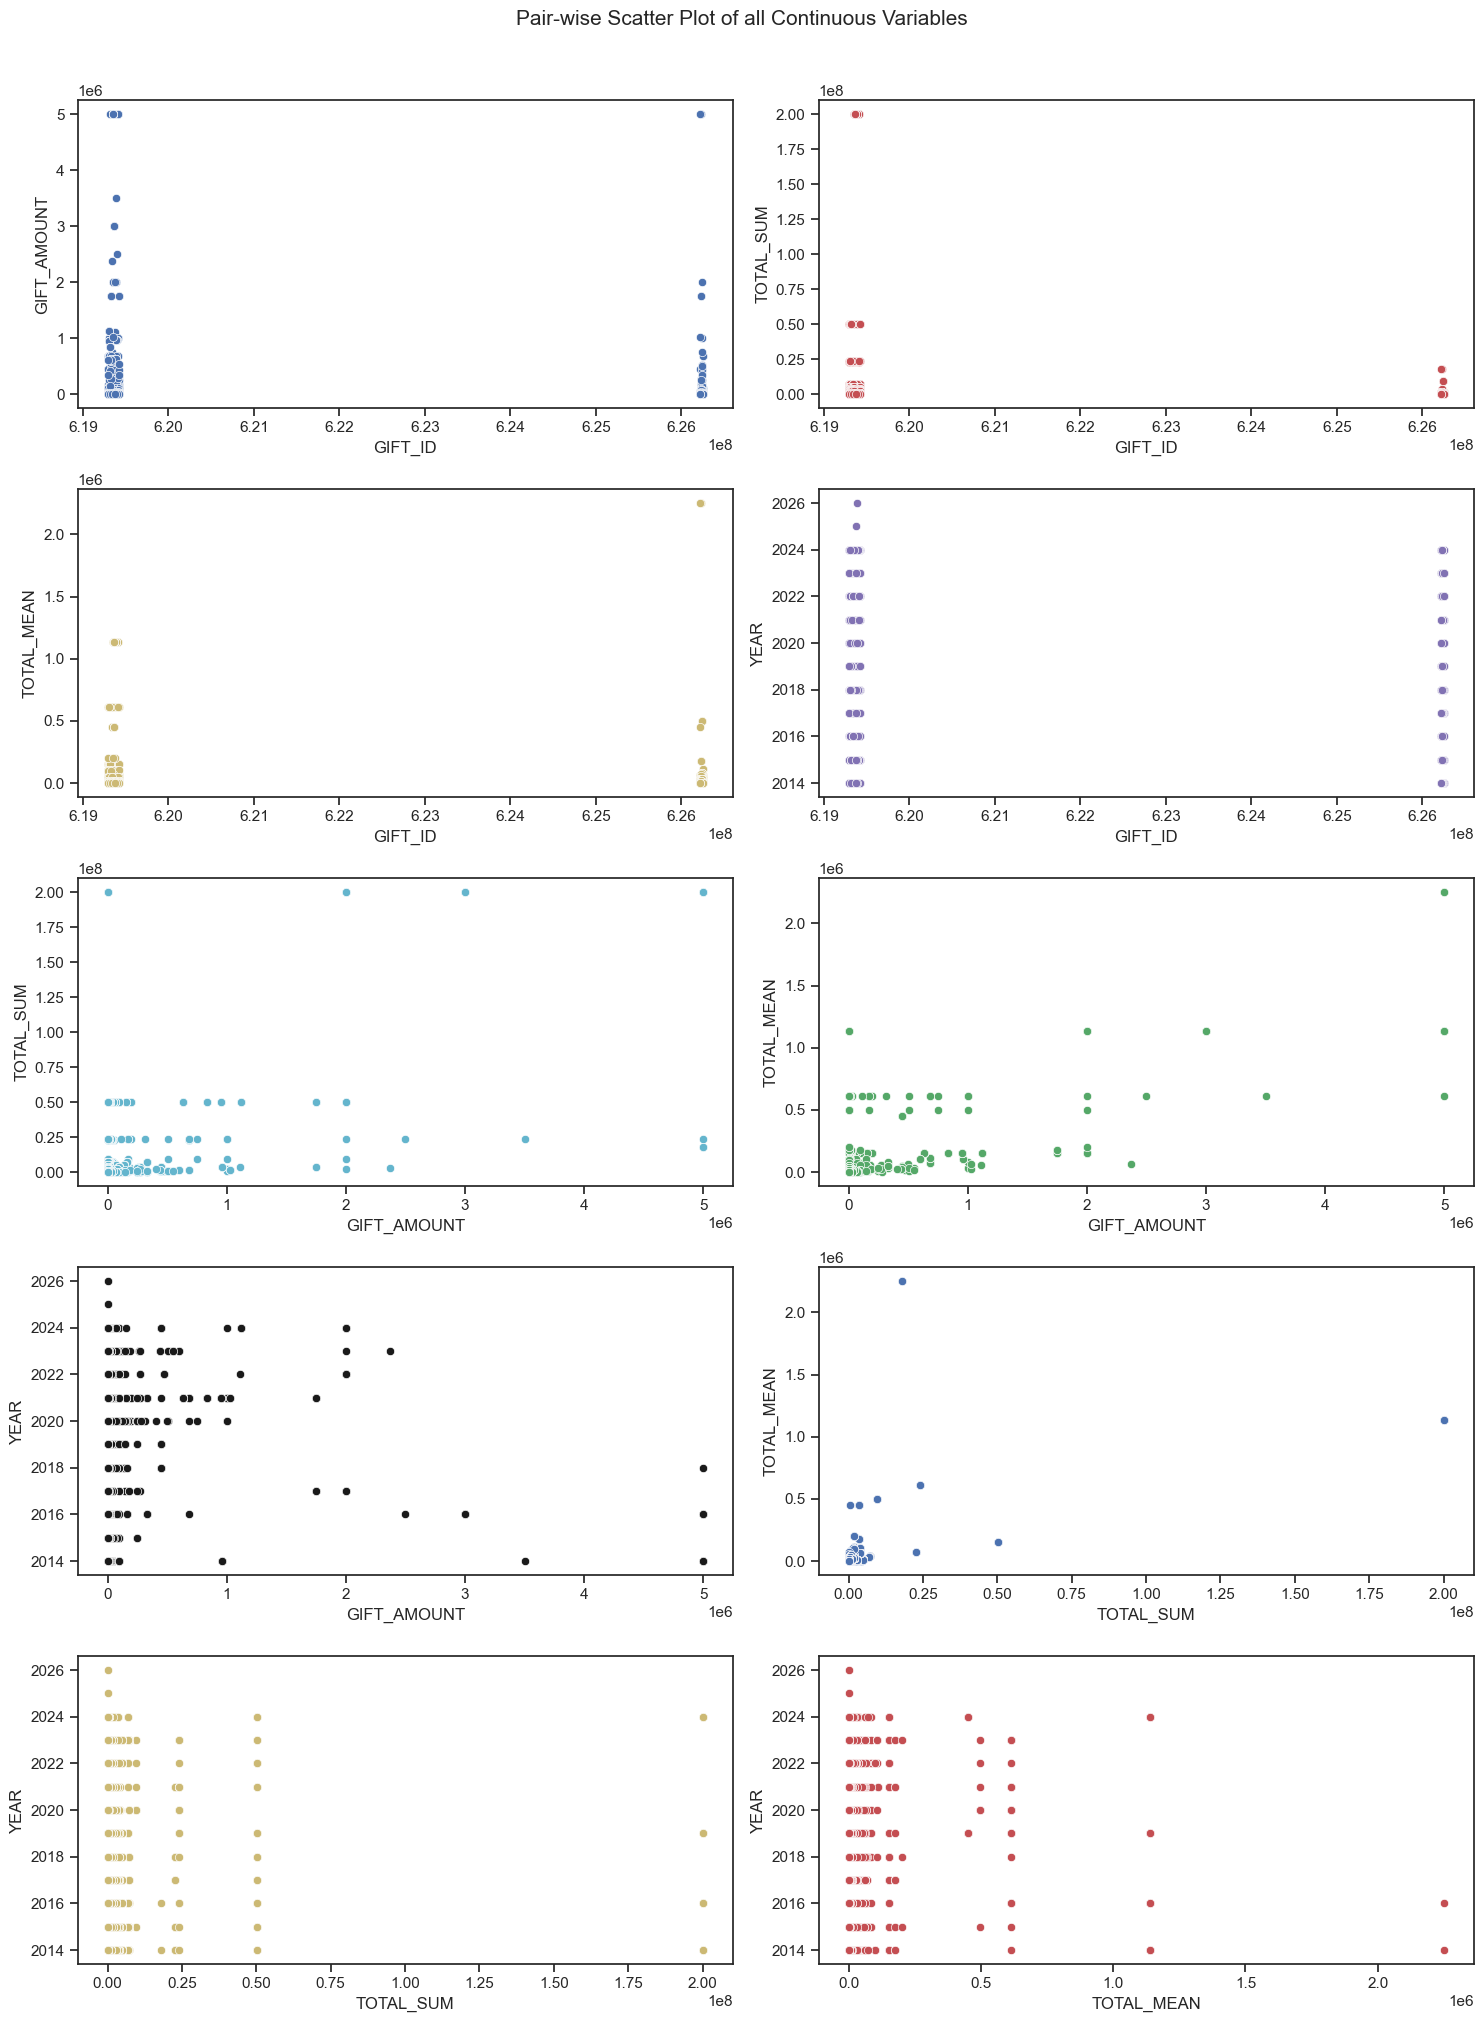

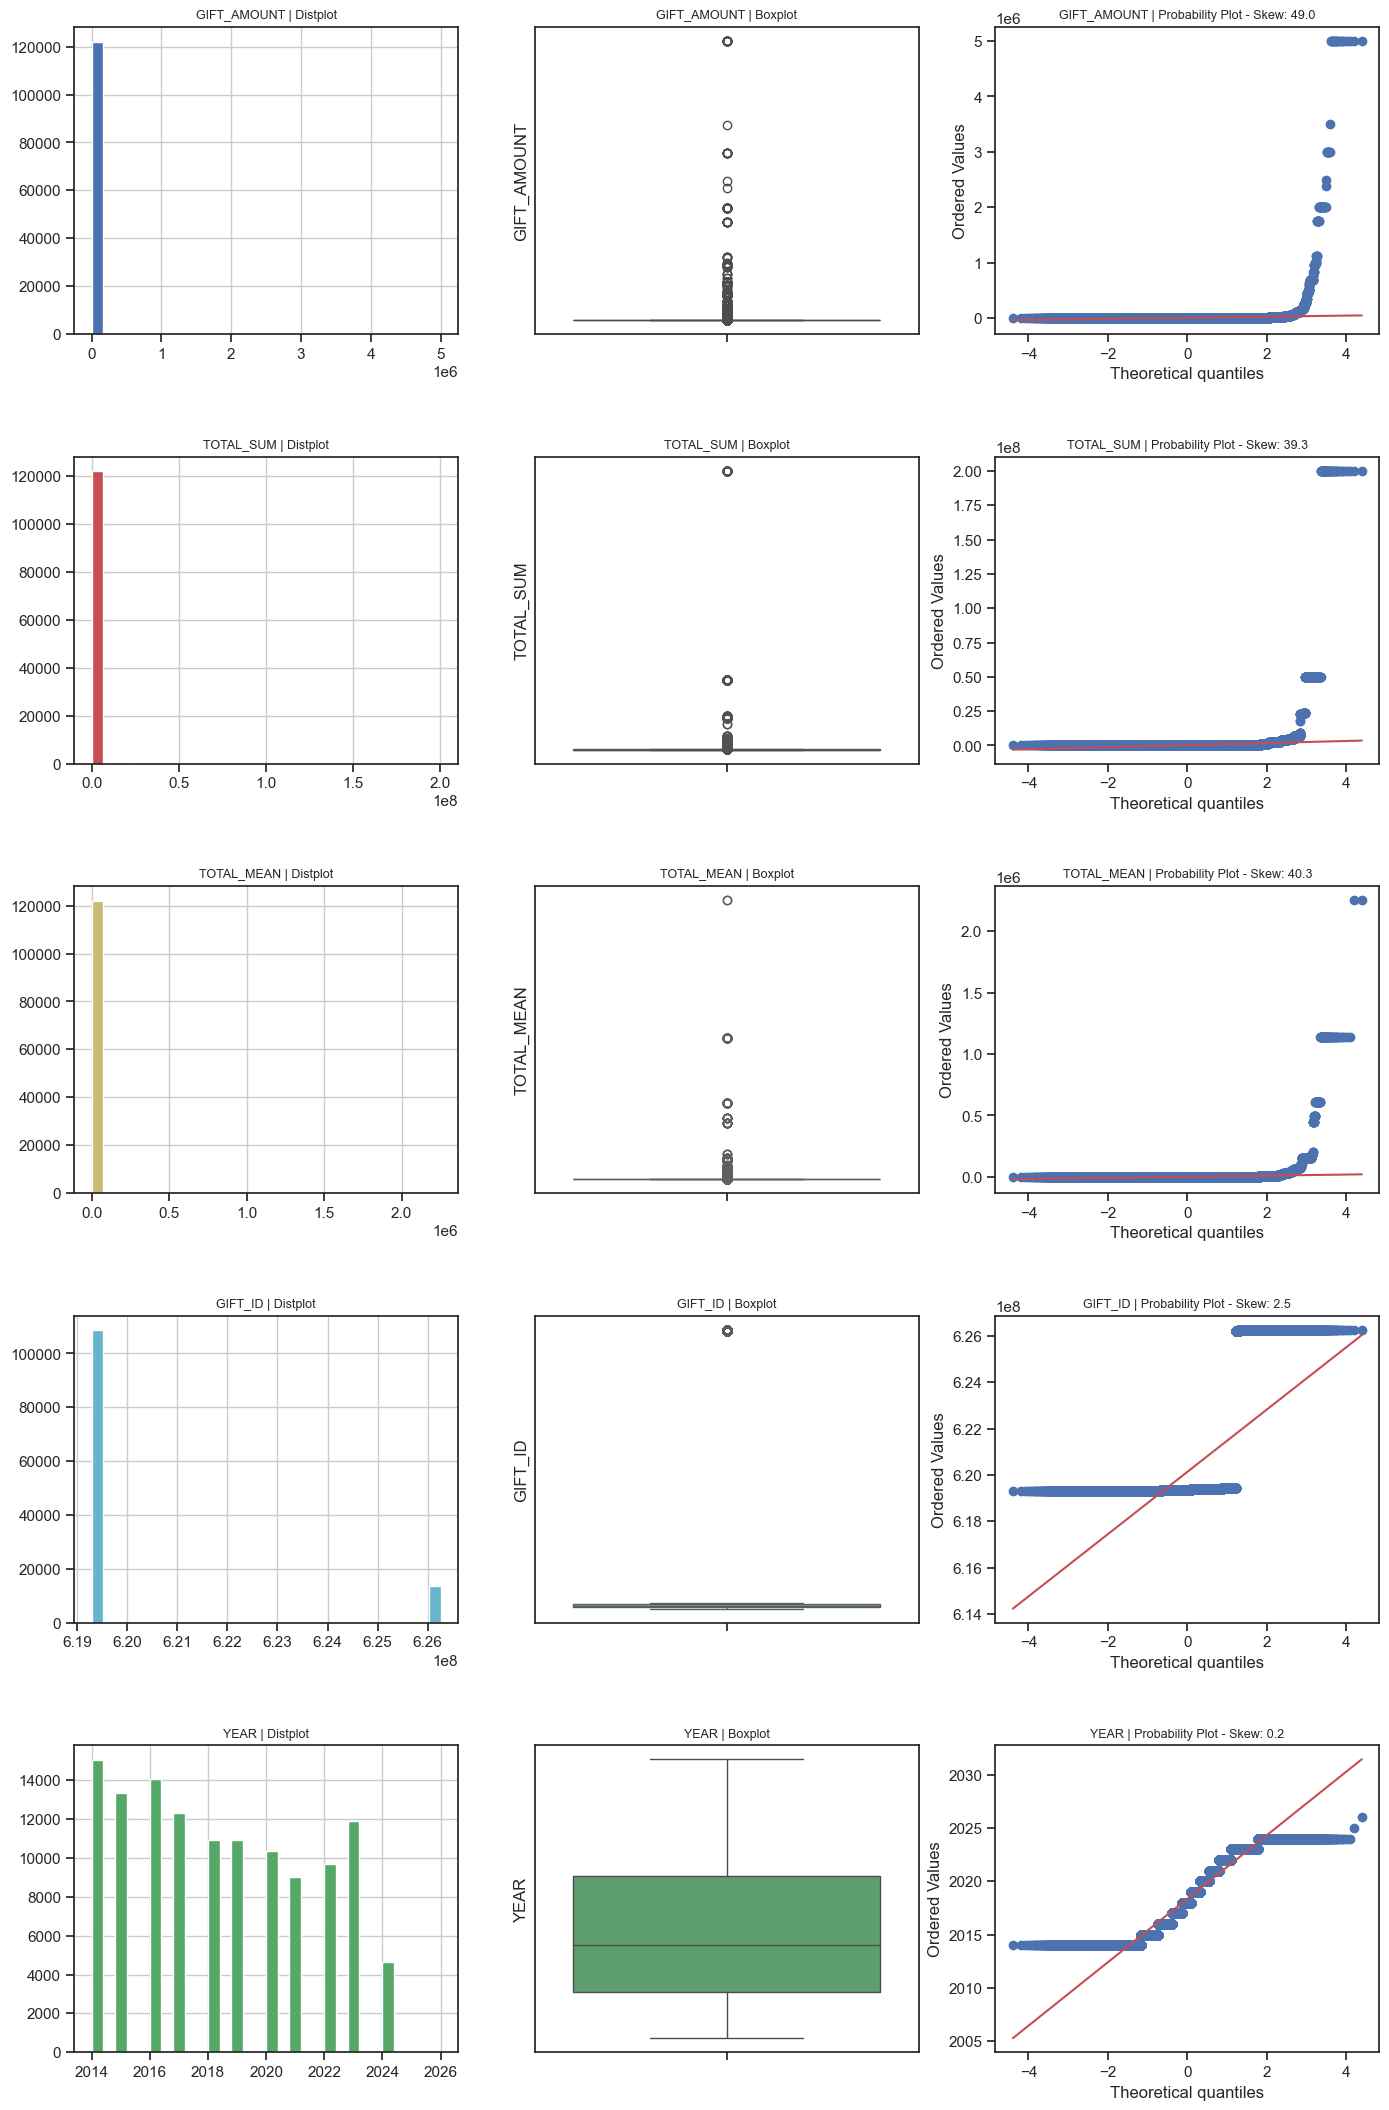

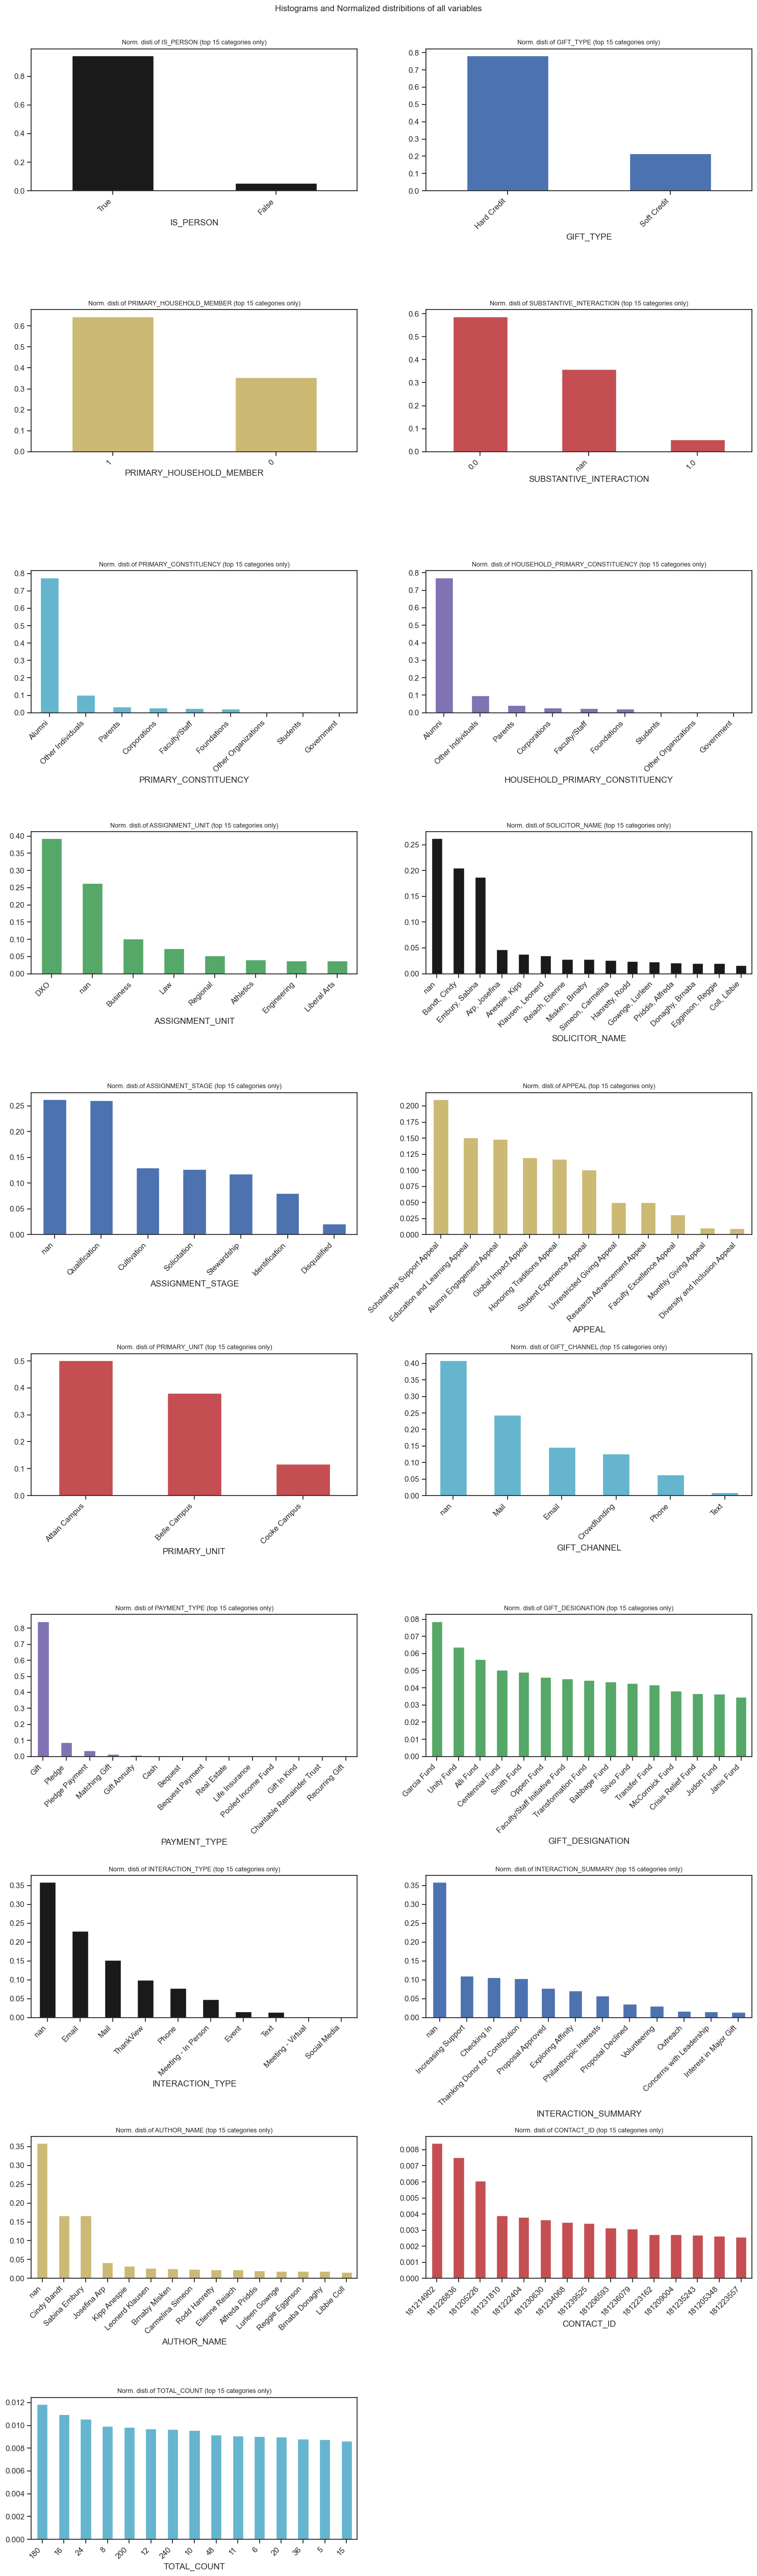

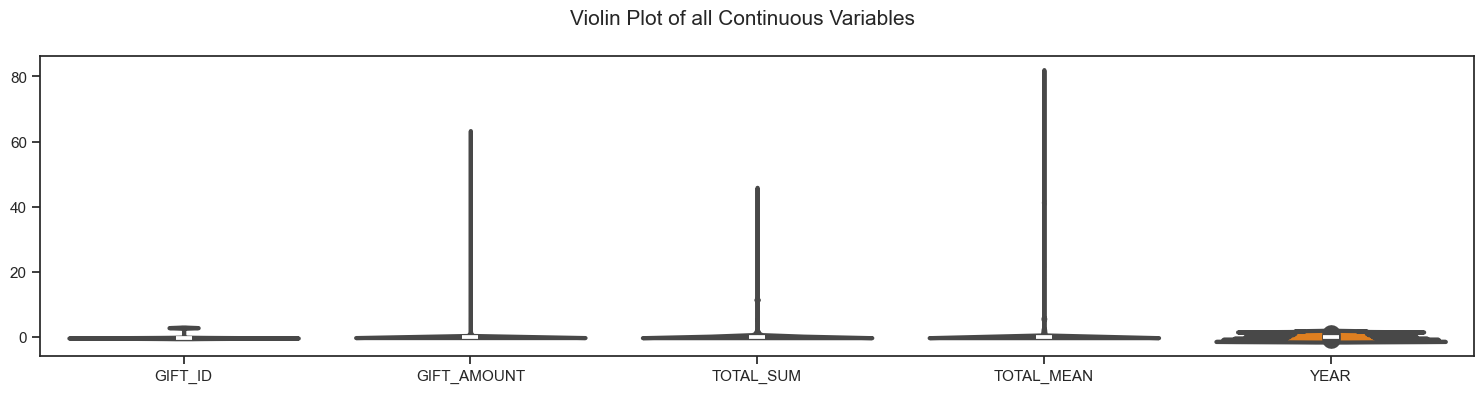

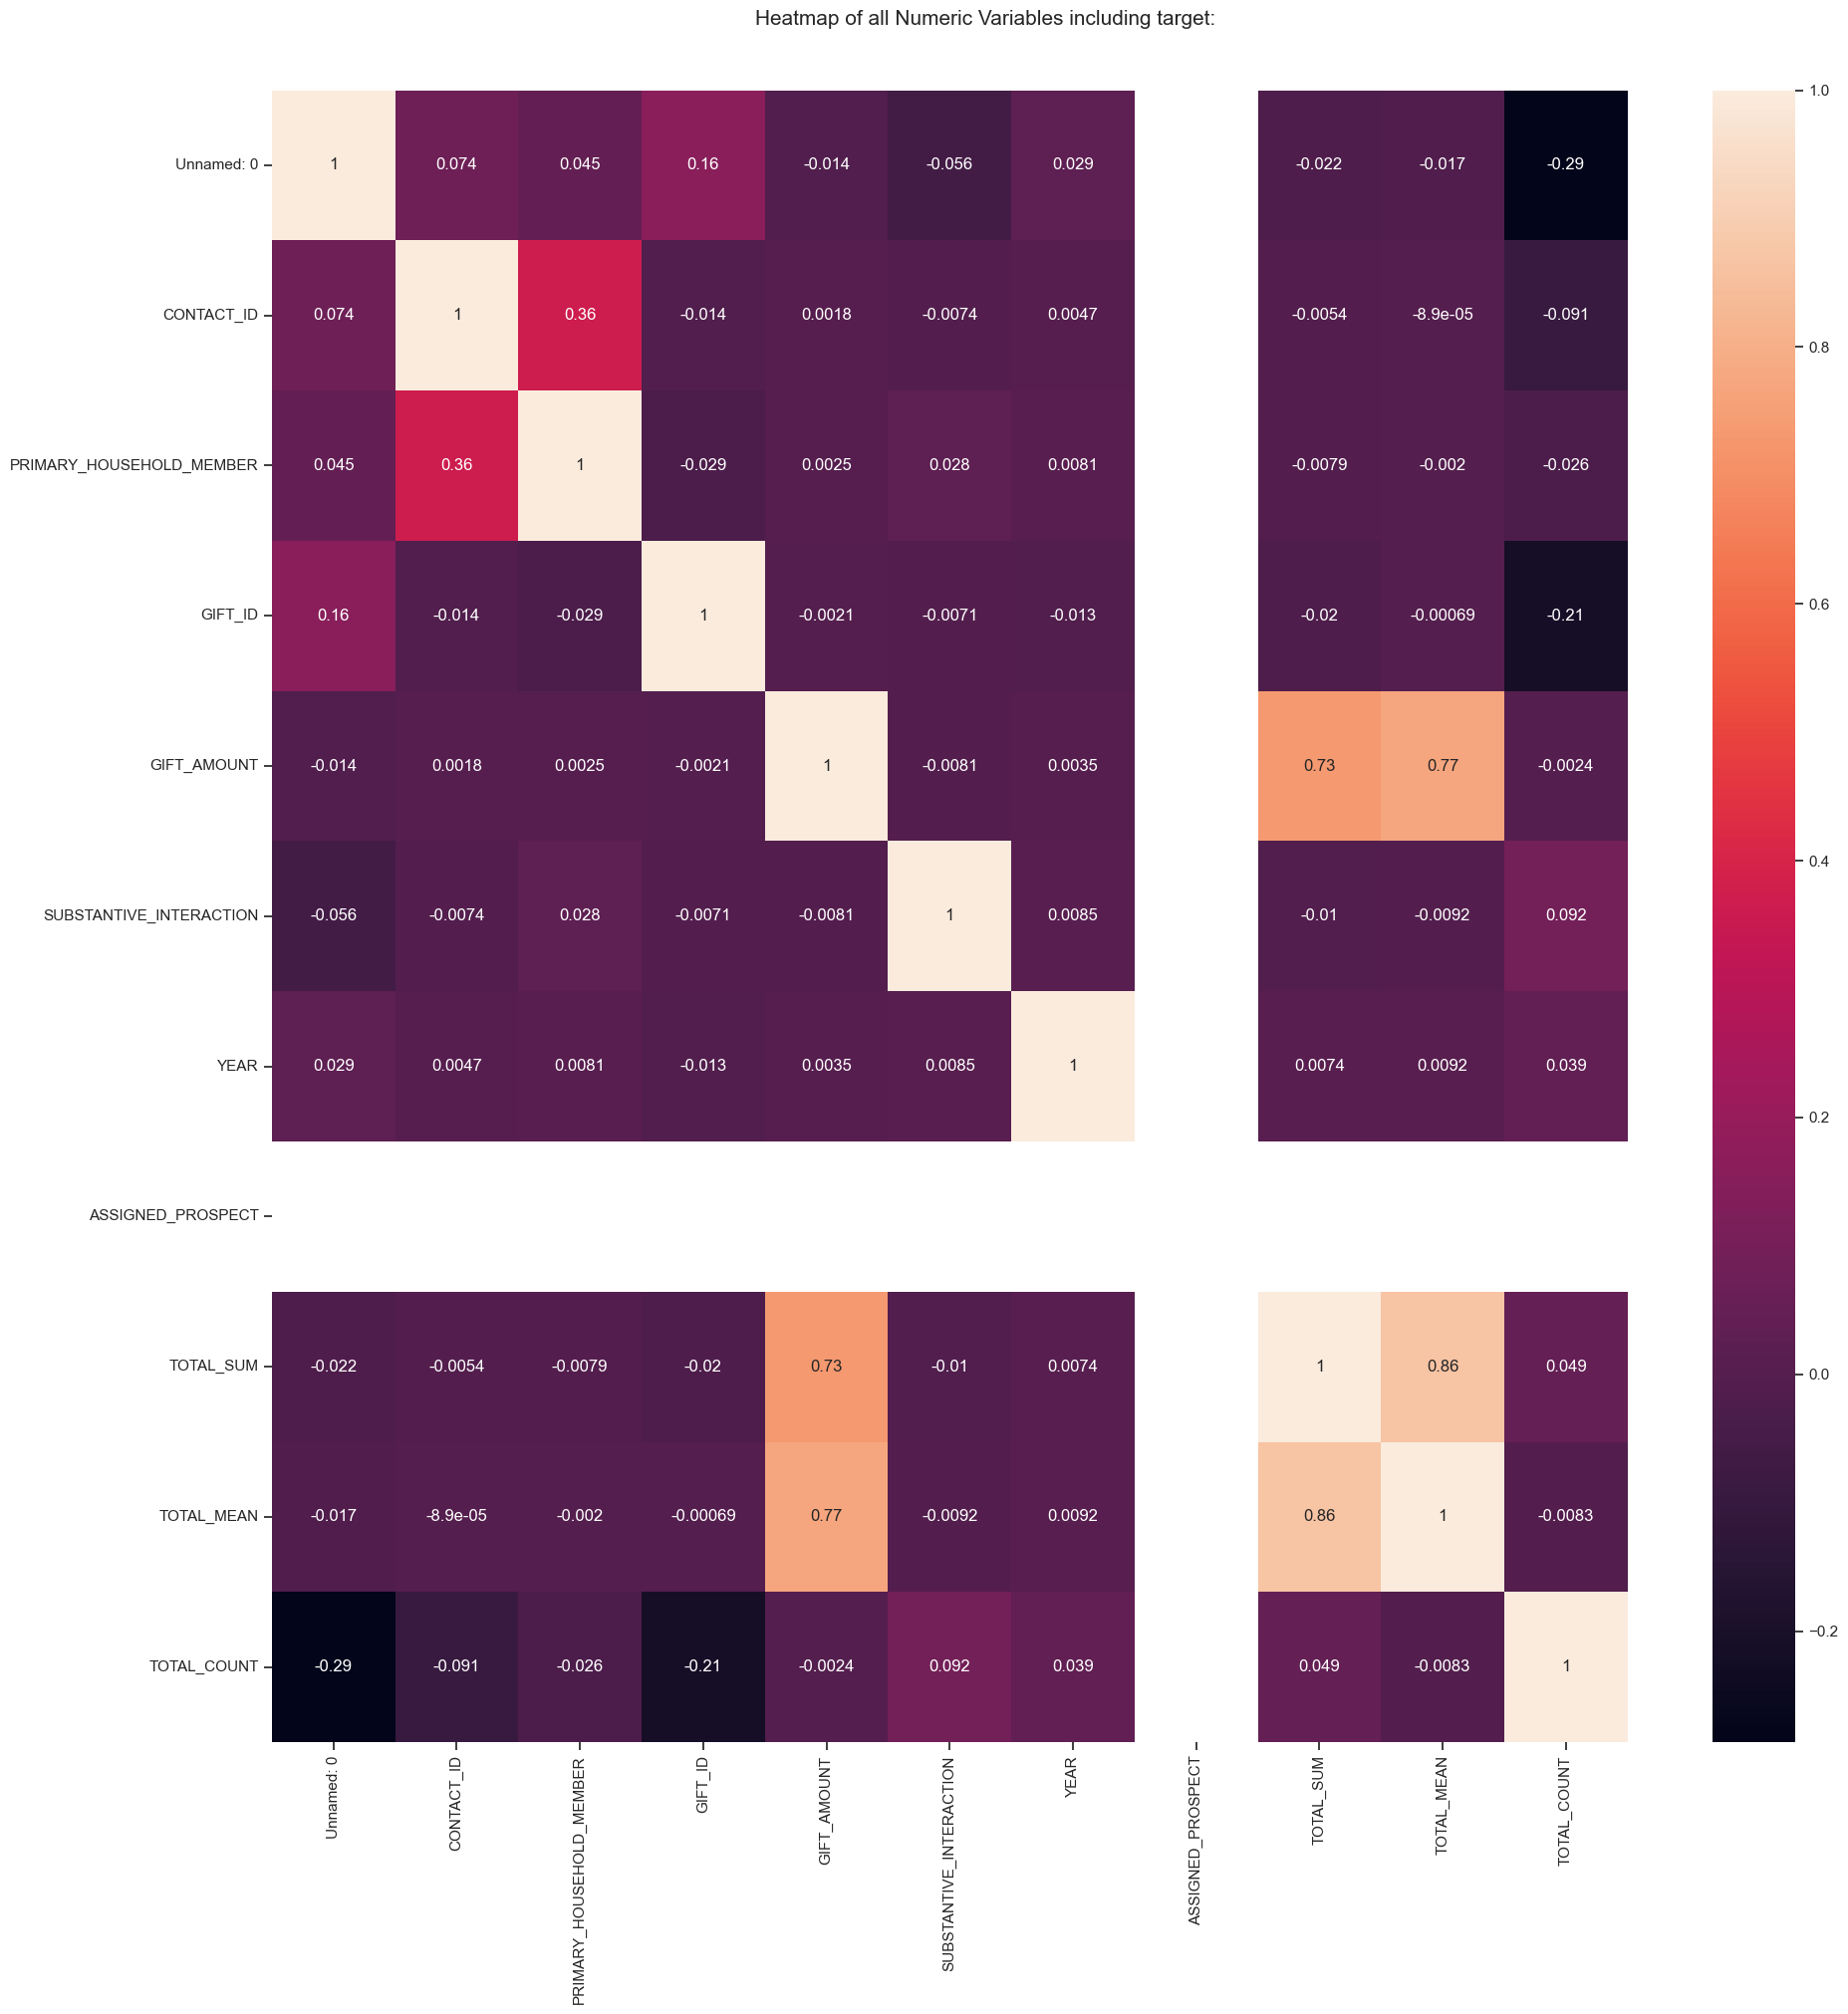

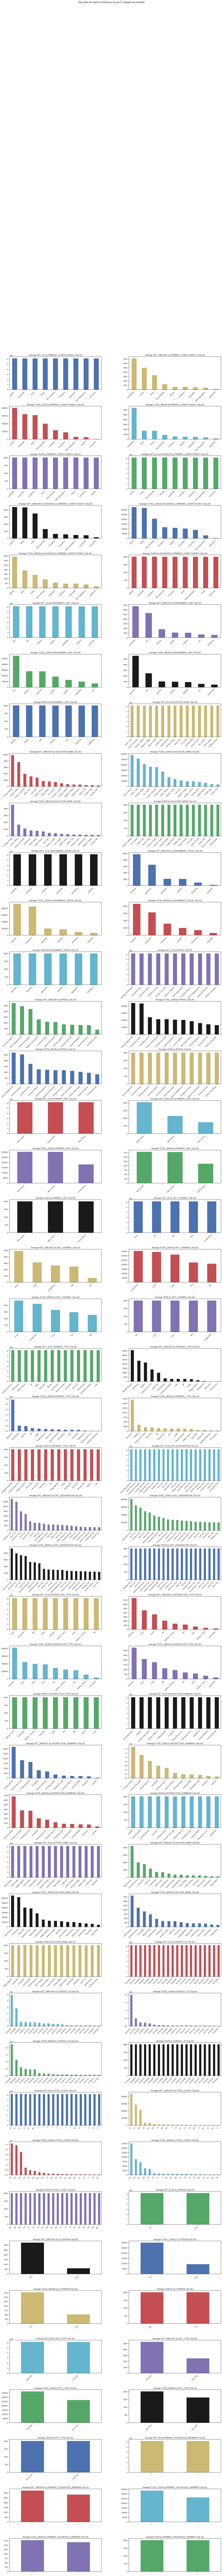

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

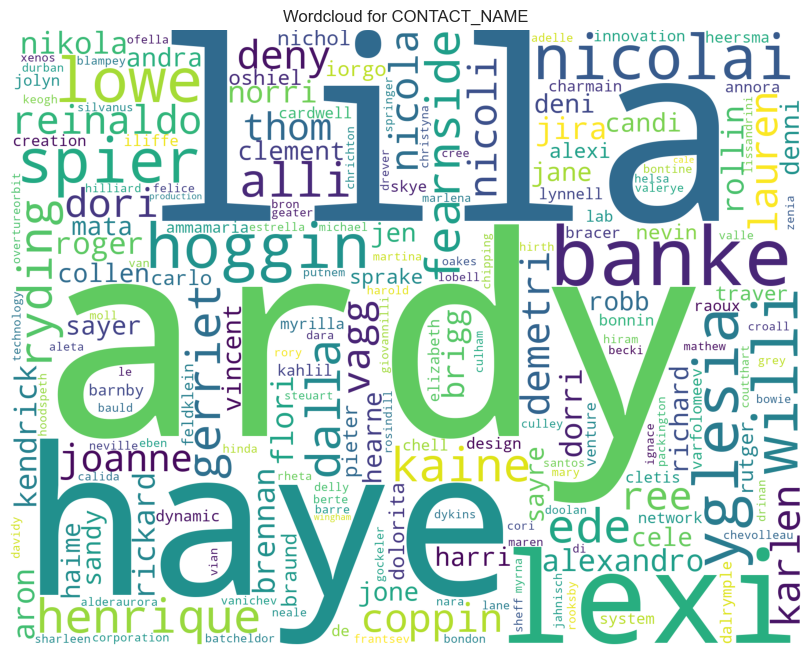

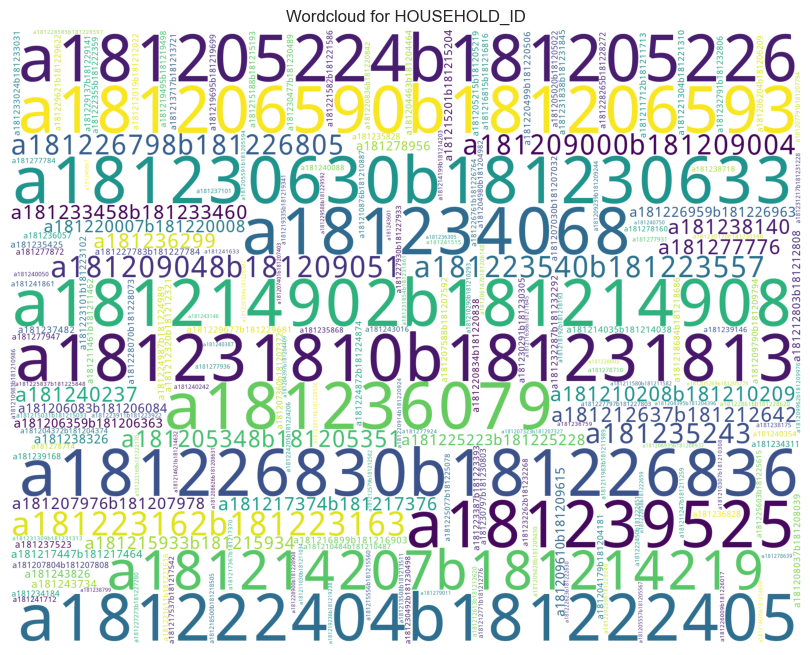

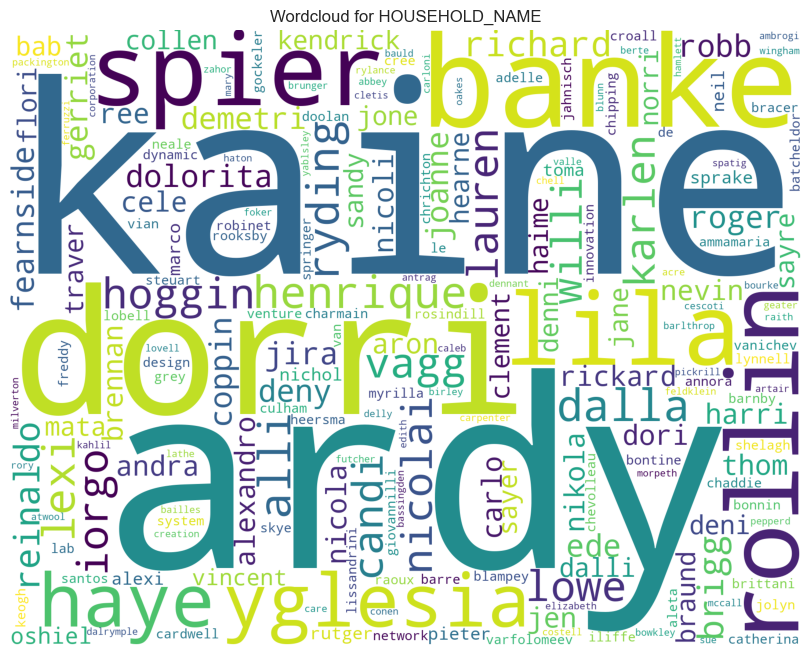

Could not draw wordcloud plot for GIFT_DATE. We need at least 1 word to plot a word cloud, got 0.


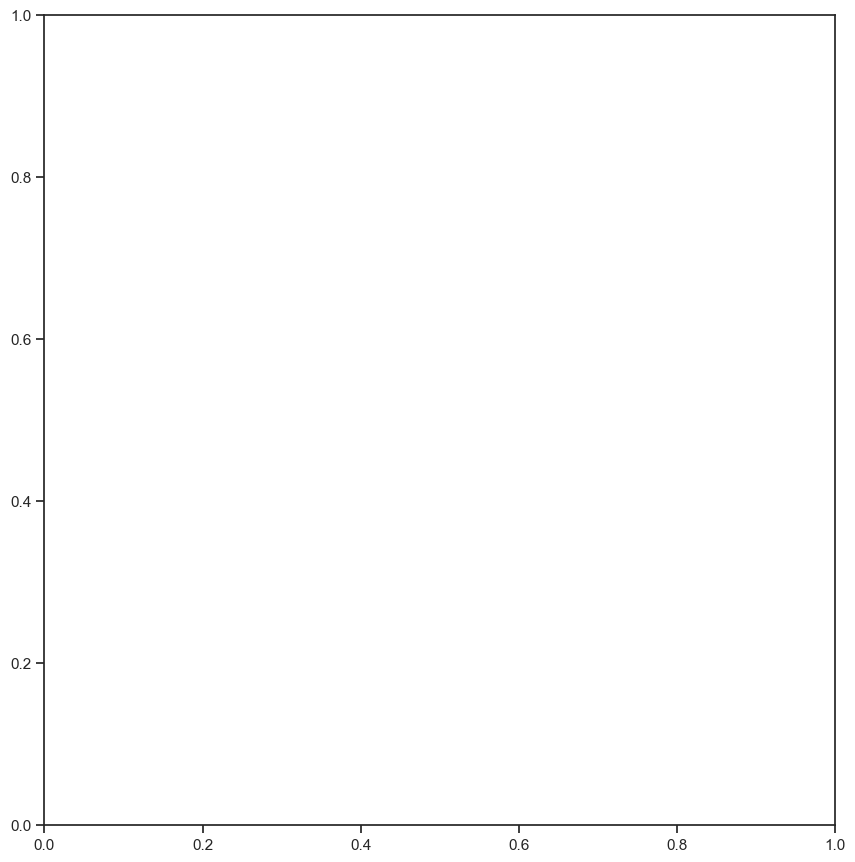

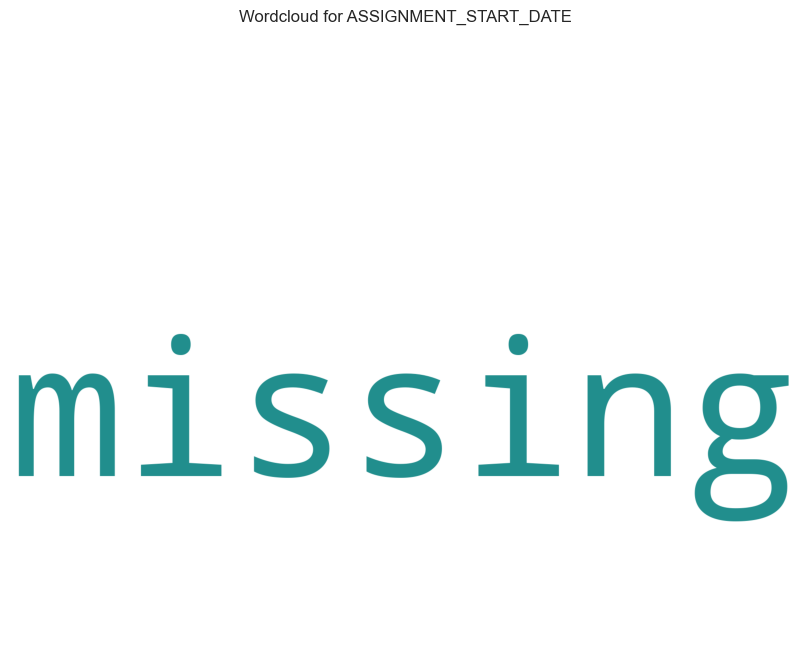

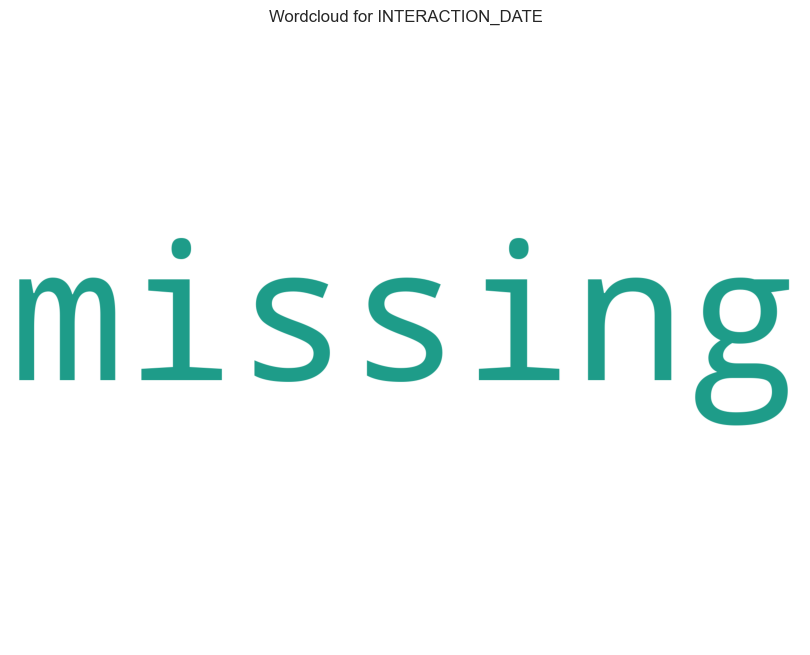

Could not draw wordcloud plot for MONTHYEAR. We need at least 1 word to plot a word cloud, got 0.
All Plots done
Time to run AutoViz = 120 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


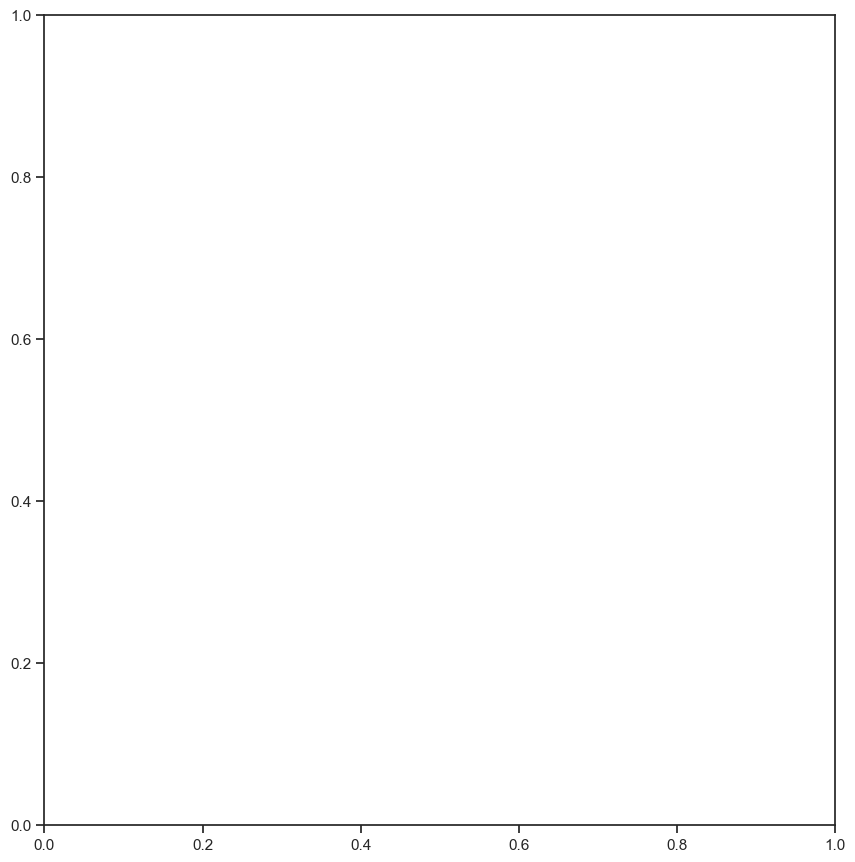

In [328]:
#Create visualizations
from autoviz.AutoViz_Class import AutoViz_Class

%matplotlib inline

AV = AutoViz_Class()

viz = AV.AutoViz("class-total.csv", sep=",")

## Clusters for Personaes

In [448]:
#Select fields for classifcation model
classification = classdatatotal.filter(items=['GIFT_AMOUNT', 'TOTAL_SUM', 'TOTAL_MEAN', 'TOTAL_COUNT', 'ASSIGNMENT_UNIT', 'PAYMENT_TYPE'])
classification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122293 entries, 0 to 321930
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   GIFT_AMOUNT      122293 non-null  float64
 1   TOTAL_SUM        122293 non-null  float64
 2   TOTAL_MEAN       122293 non-null  float64
 3   TOTAL_COUNT      122293 non-null  int64  
 4   ASSIGNMENT_UNIT  90189 non-null   object 
 5   PAYMENT_TYPE     122293 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 6.5+ MB


In [450]:
#Encode object fields
classification = pd.get_dummies(classification, columns = ['ASSIGNMENT_UNIT', 'PAYMENT_TYPE'])
#Removed appeal as it did not factor into clusters
classification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122293 entries, 0 to 321930
Data columns (total 25 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   GIFT_AMOUNT                              122293 non-null  float64
 1   TOTAL_SUM                                122293 non-null  float64
 2   TOTAL_MEAN                               122293 non-null  float64
 3   TOTAL_COUNT                              122293 non-null  int64  
 4   ASSIGNMENT_UNIT_Athletics                122293 non-null  bool   
 5   ASSIGNMENT_UNIT_Business                 122293 non-null  bool   
 6   ASSIGNMENT_UNIT_DXO                      122293 non-null  bool   
 7   ASSIGNMENT_UNIT_Engineering              122293 non-null  bool   
 8   ASSIGNMENT_UNIT_Law                      122293 non-null  bool   
 9   ASSIGNMENT_UNIT_Liberal Arts             122293 non-null  bool   
 10  ASSIGNMENT_UNIT_Regional             

In [452]:
#drop null values
classification = classification.dropna()

In [454]:
#create pipeline
pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=7, random_state=42))])

In [456]:
#fit classifcation model
pipeline.fit(classification)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=7, random_state=42))])

In [458]:
#Create cluster labels
classification['cluster'] = pipeline.named_steps['kmeans'].labels_

In [460]:
#Create cluster summary
cluster_summary = classification.groupby('cluster').mean()
print(cluster_summary)

          GIFT_AMOUNT    TOTAL_SUM    TOTAL_MEAN   TOTAL_COUNT  \
cluster                                                          
0        2.901657e+03  2.355798e+05  1.466793e+03  193.437358    
1        2.081717e+03  3.274700e+05  1.286736e+03  252.448118    
2        1.257185e+03  1.097915e+05  1.050688e+03  162.316925    
3        2.971939e+06  1.864108e+08  1.160121e+06  164.269231    
4        1.483009e+03  2.029249e+05  1.255642e+03  199.678365    
5        1.092514e+03  1.919301e+05  1.023923e+03  218.843718    
6        2.402711e+04  1.284083e+06  7.784413e+03  242.112735    

         ASSIGNMENT_UNIT_Athletics  ASSIGNMENT_UNIT_Business  \
cluster                                                        
0                0.000000                   0.097289           
1                0.000000                   0.000000           
2                0.000000                   0.180434           
3                0.000000                   0.000000           
4                0.04

In [466]:
classification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122293 entries, 0 to 321930
Data columns (total 26 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   GIFT_AMOUNT                              122293 non-null  float64
 1   TOTAL_SUM                                122293 non-null  float64
 2   TOTAL_MEAN                               122293 non-null  float64
 3   TOTAL_COUNT                              122293 non-null  int64  
 4   ASSIGNMENT_UNIT_Athletics                122293 non-null  bool   
 5   ASSIGNMENT_UNIT_Business                 122293 non-null  bool   
 6   ASSIGNMENT_UNIT_DXO                      122293 non-null  bool   
 7   ASSIGNMENT_UNIT_Engineering              122293 non-null  bool   
 8   ASSIGNMENT_UNIT_Law                      122293 non-null  bool   
 9   ASSIGNMENT_UNIT_Liberal Arts             122293 non-null  bool   
 10  ASSIGNMENT_UNIT_Regional             

Inertia  [2935032.0000000102, 2745323.629080459, 2559189.3118040375, 2435939.4751307117, 2290105.247695518, 2148346.2233394696, 2020862.8971885869, 1884815.0494671788, 1767422.3948014788, 1653320.475293908, 1530148.2173103725, 1390534.0380055744, 1277531.5022448325, 1155230.6577253477, 1032622.4442623516, 910322.0192249567, 788021.1694612661, 678623.8667829357, 576273.5033434285, 474563.1991921948, 371894.9265461622, 284939.3570706059, 255004.4094679754, 226731.6732628297, 207172.4961518815, 195146.55372237272, 185520.5583001901, 174138.8164505012, 163633.57580731317, 156699.25894940578, 148806.23038812028, 136793.19491315895, 132039.64747520603, 124934.06272688805, 116035.76479191017, 115401.26130709097, 108718.45342190334, 105128.45736787406, 98054.75963939044, 94683.95036164293, 91477.10750194316, 88059.41606339128, 85609.42917695119, 82299.93190773713, 77109.98856027187, 76083.68340613015, 71853.07203154333, 69506.00094628033, 66492.28239252746, 66867.12613746784]


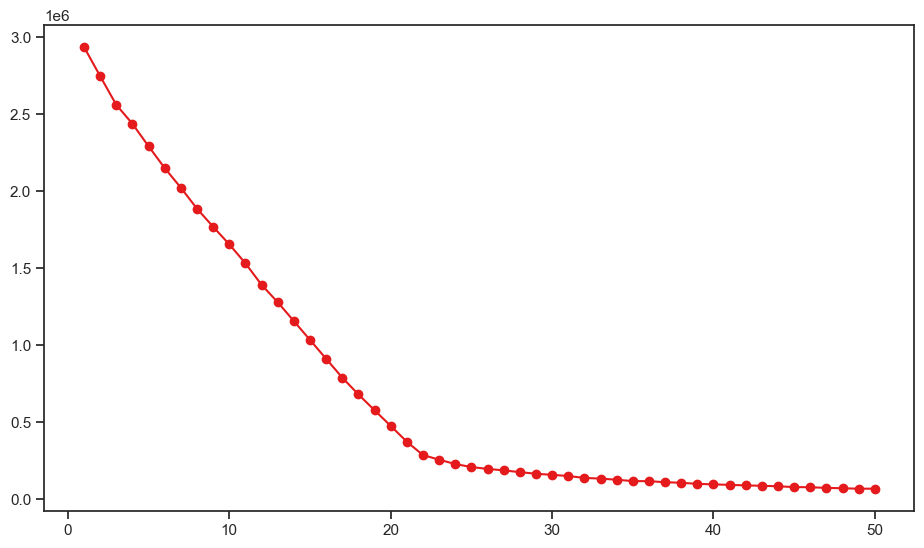

In [468]:
#Create an elbow curve to discover optimum clusters, showed the elbow optimized all the way at 20 clusters

inertia = []

selected_columns =  ['TOTAL_SUM', 'TOTAL_COUNT', 'TOTAL_MEAN', 'ASSIGNMENT_UNIT_Athletics', 'ASSIGNMENT_UNIT_Business', 'ASSIGNMENT_UNIT_DXO', 'ASSIGNMENT_UNIT_Engineering',  
'ASSIGNMENT_UNIT_Law', 'ASSIGNMENT_UNIT_Liberal Arts', 'ASSIGNMENT_UNIT_Regional', 'PAYMENT_TYPE_Bequest', 'PAYMENT_TYPE_Bequest Payment', 'PAYMENT_TYPE_Cash', 
'PAYMENT_TYPE_Charitable Remainder Trust', 'PAYMENT_TYPE_Gift', 'PAYMENT_TYPE_Gift Annuity', 'PAYMENT_TYPE_Gift In Kind', 'PAYMENT_TYPE_Life Insurance', 
'PAYMENT_TYPE_Matching Gift', 'PAYMENT_TYPE_Pledge', 'PAYMENT_TYPE_Pledge Payment', 'PAYMENT_TYPE_Pooled Income Fund', 'PAYMENT_TYPE_Real Estate', 'PAYMENT_TYPE_Recurring Gift']

classification = classification.filter(items=[ 'TOTAL_SUM', 'TOTAL_COUNT', 'TOTAL_MEAN', 'ASSIGNMENT_UNIT_Athletics', 'ASSIGNMENT_UNIT_Business', 'ASSIGNMENT_UNIT_DXO', 'ASSIGNMENT_UNIT_Engineering',  
'ASSIGNMENT_UNIT_Law', 'ASSIGNMENT_UNIT_Liberal Arts', 'ASSIGNMENT_UNIT_Regional', 'PAYMENT_TYPE_Bequest', 'PAYMENT_TYPE_Bequest Payment', 'PAYMENT_TYPE_Cash', 
'PAYMENT_TYPE_Charitable Remainder Trust', 'PAYMENT_TYPE_Gift', 'PAYMENT_TYPE_Gift Annuity', 'PAYMENT_TYPE_Gift In Kind', 'PAYMENT_TYPE_Life Insurance', 
'PAYMENT_TYPE_Matching Gift', 'PAYMENT_TYPE_Pledge', 'PAYMENT_TYPE_Pledge Payment', 'PAYMENT_TYPE_Pooled Income Fund', 'PAYMENT_TYPE_Real Estate', 'PAYMENT_TYPE_Recurring Gift'])

scaler = StandardScaler() 

datascaled = scaler.fit_transform(classification)

preprocessed = pd. DataFrame(datascaled, columns=selected_columns)


for k in range(1,51):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(preprocessed)
    inertia.append(kmeans.inertia_)

print("Inertia ", inertia)


plt.figure(figsize=(10,6))
plt.plot(range(1,51), inertia, marker='o')
plt.show()

## Top Donor Prediction - Regression

In [88]:
#Calculate the overall mean gift

mean_gift = apradatatotal['GIFT_AMOUNT'].mean()
print (mean_gift)

1754.793483499361


In [90]:
#Create a top donor field
apradatatotal['Top Donor'] = (apradatatotal['GIFT_AMOUNT']>1754).astype(int)

In [147]:
#Clear out null values
apradatatotal = apradatatotal.dropna()

In [149]:
apradatatotal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116372 entries, 39 to 240802
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CONTACT_ID                      116372 non-null  int64         
 1   IS_PERSON                       116372 non-null  bool          
 2   DECEASED                        116372 non-null  bool          
 3   CONTACT_NAME                    116372 non-null  object        
 4   HOUSEHOLD_ID                    116372 non-null  object        
 5   PRIMARY_HOUSEHOLD_MEMBER        116372 non-null  int32         
 6   HOUSEHOLD_NAME                  116372 non-null  object        
 7   PRIMARY_CONSTITUENCY            116372 non-null  object        
 8   HOUSEHOLD_PRIMARY_CONSTITUENCY  116372 non-null  object        
 9   ASSIGNED_PROSEPCT               116372 non-null  bool          
 10  ASSIGNMENT_UNIT                 116372 non-null  object     

In [281]:
#Create model data sets

columns_to_drop = ['CONTACT_ID', 'TOTAL_SUM', 'TOTAL_MEAN', 'IS_PERSON', 'DECEASED', 'CONTACT_NAME', 'HOUSEHOLD_ID', 'PRIMARY_HOUSEHOLD_MEMBER', 'HOUSEHOLD_NAME', 'PRIMARY_CONSTITUENCY',      
'HOUSEHOLD_PRIMARY_CONSTITUENCY', 'ASSIGNED_PROSEPCT', 'ASSIGNMENT_START_DATE',  'ASSIGNMENT_STAGE', 'GIFT_DESIGNATION', 'INTERACTION_DATE', 'INTERACTION_TYPE',              
'SUBSTANTIVE_INTERACTION', 'INTERACTION_SUMMARY', 'AUTHOR_NAME', 'MONTHYEAR', 'YEAR', 'ASSIGNED_PROSPECT', 'GIFT_DATE',  'GIFT_AMOUNT', 'GIFT_ID', 'Top Donor']

X = apradatatotal.drop(columns=columns_to_drop, axis=1)
y = apradatatotal['Top Donor']

In [283]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116372 entries, 39 to 240802
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ASSIGNMENT_UNIT  116372 non-null  object
 1   SOLICITOR_NAME   116372 non-null  object
 2   APPEAL           116372 non-null  object
 3   PRIMARY_UNIT     116372 non-null  object
 4   GIFT_CHANNEL     116372 non-null  object
 5   PAYMENT_TYPE     116372 non-null  object
 6   GIFT_TYPE        116372 non-null  object
 7   TOTAL_COUNT      116372 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.0+ MB


In [285]:
#load categorical columns for later encoding
categoricals = X.select_dtypes(include=['object']).columns
print(categoricals)

Index(['ASSIGNMENT_UNIT', 'SOLICITOR_NAME', 'APPEAL', 'PRIMARY_UNIT',
       'GIFT_CHANNEL', 'PAYMENT_TYPE', 'GIFT_TYPE'],
      dtype='object')


In [287]:
#Encode categoricals
X_encoded = pd.get_dummies(X, columns = categoricals, drop_first=True)

In [289]:
#Create trainging and test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [291]:
#Run lasso to see top, non zero features
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [293]:
lasso_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': lasso.coef_
})

In [295]:
#Print out important features
important_features = lasso_importance[lasso_importance['Coefficient']!=0]
print(important_features)

       Feature  Coefficient
0  TOTAL_COUNT     0.000045


In [297]:
#Scale
scaler = StandardScaler()

In [301]:
#Scale and fit

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [303]:
logreg = LogisticRegression()

In [305]:
#Create a parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']
}

In [307]:
#Run grid search model and cross validation

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [309]:
#Print out best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


In [311]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [313]:
#Reviews KPIs
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     33474
           1       1.00      0.26      0.42      1438

    accuracy                           0.97     34912
   macro avg       0.98      0.63      0.70     34912
weighted avg       0.97      0.97      0.96     34912



In [323]:
#Check Scores
cross_val_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print("Cross=validation Scores:", cross_val_scores)
print("Mean CV Accuracy:", cross_val_scores.mean())

Cross=validation Scores: [0.96851215 0.96894181 0.96943285 0.96943285 0.96931009]
Mean CV Accuracy: 0.9691259513871839
